In [71]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

In [58]:
warnings.filterwarnings('ignore')

# Get the Dataset 

Using Movie Lens 100K dataset 

In [59]:
columns_names=['user_id','item_id','rating','timestamp']
df=pd.read_csv('ml-100k/ml-100k/u.data',sep='\t',names=columns_names)

In [60]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [61]:
df.shape

(100000, 4)

In [76]:
len(df['user_id'].unique())
unique_items=np.array(df['user_id'].unique())
print(unique_items)

[196 186  22 244 166 298 115 253 305   6  62 286 200 210 224 303 122 194
 291 234 119 167 299 308  95  38 102  63 160  50 301 225 290  97 157 181
 278 276   7  10 284 201 287 246 242 249  99 178 251  81 260  25  59  72
  87  42 292  20  13 138  60  57 223 189 243  92 241 254 293 127 222 267
  11   8 162 279 145  28 135  32  90 216 250 271 265 198 168 110  58 237
  94 128  44 264  41  82 262 174  43  84 269 259  85 213 121  49 155  68
 172  19 268   5  80  66  18  26 130 256   1  56  15 207 232  52 161 148
 125  83 272 151  54  16  91 294 229  36  70  14 295 233 214 192 100 307
 297 193 113 275 219 218 123 158 302  23 296  33 154  77 270 187 170 101
 184 112 133 215  69 104 240 144 191  61 142 177 203  21 197 134 180 236
 263 109  64 114 239 117  65 137 257 111 285  96 116  73 221 235 164 281
 182 129  45 131 230 126 231 280 288 152 217  79  75 245 282  78 118 283
 171 107 226 306 173 185 150 274 188  48 311 165 208   2 205 248  93 159
 146  29 156  37 141 195 108  47 255  89 140 190  2

In [63]:
df['item_id'].nunique()

1682

In [64]:
movies_title=pd.read_csv('ml-100k/ml-100k/u.item',sep="\|",header=None,encoding = "ISO-8859-1")

In [65]:
movies_title.shape

(1682, 24)

In [66]:
movies_title.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [67]:
movies_title=movies_title[[0,1]]

In [68]:
movies_title.columns=['item_id','title']

In [69]:
movies_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [75]:
merged_data=pd.merge(df,movies_title,on="item_id")
print(merged_data)

# print(merged_data.values)
merged_val=np.array(merged_data.values)
print(merged_val)

       user_id  item_id  rating  timestamp  \
0          196      242       3  881250949   
1           63      242       3  875747190   
2          226      242       5  883888671   
3          154      242       3  879138235   
4          306      242       5  876503793   
...        ...      ...     ...        ...   
99995      840     1674       4  891211682   
99996      655     1640       3  888474646   
99997      655     1637       3  888984255   
99998      655     1630       3  887428735   
99999      655     1641       3  887427810   

                                                   title  
0                                           Kolya (1996)  
1                                           Kolya (1996)  
2                                           Kolya (1996)  
3                                           Kolya (1996)  
4                                           Kolya (1996)  
...                                                  ...  
99995                             

# Exploratory Data analysis

In [90]:
merged_data.groupby('title').mean()['rating'].sort_values(ascending=False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [93]:
merged_data.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [94]:
ratings=pd.DataFrame(merged_data.groupby('title').mean()['rating'])

In [95]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [98]:
ratings['num of ratings']=pd.DataFrame(merged_data.groupby('title').count()['rating'])

In [99]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [100]:
X=np.array(ratings['rating'])
Y=np.array(ratings['num of ratings'])

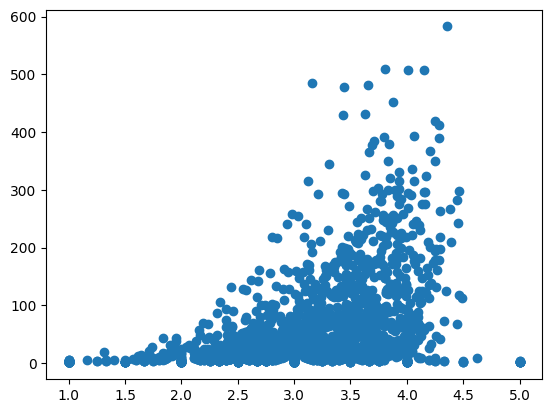

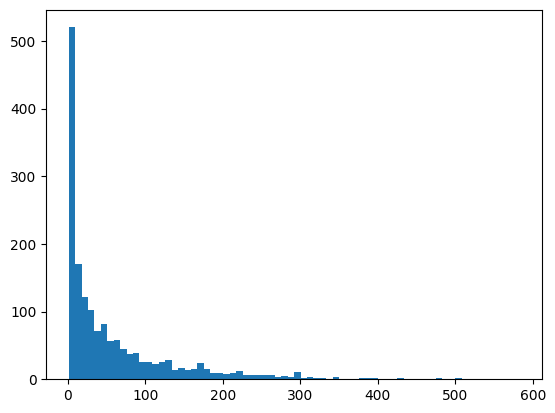

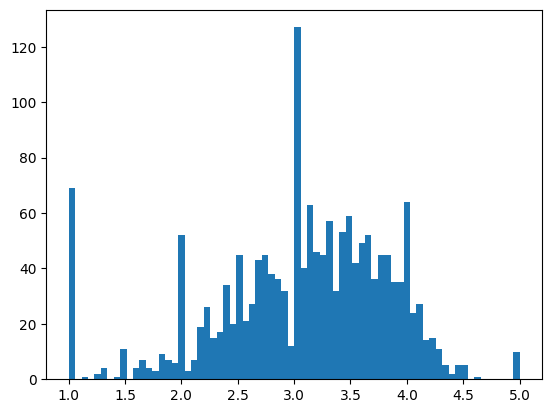

In [105]:
plt.scatter(X,Y)
plt.show()
plt.hist(Y,bins=70)
plt.show()
plt.hist(X,bins=70)
plt.show()

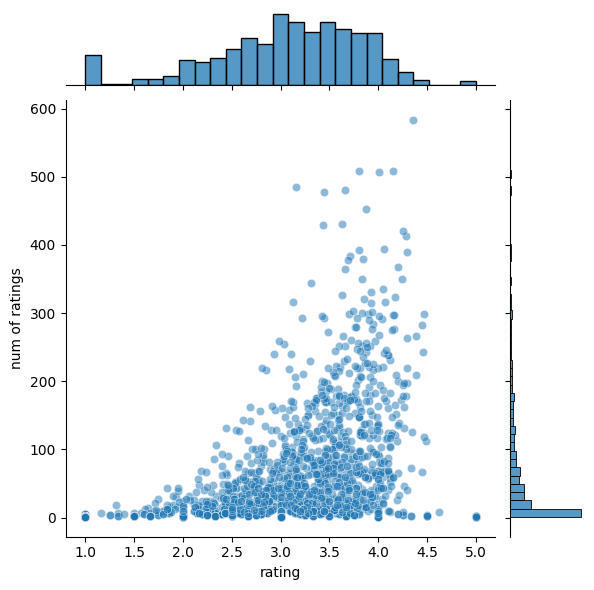

In [109]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

# Creating Movie Recommendation

In [110]:
merged_data.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [113]:
moviemat=merged_data.pivot_table(index="user_id",columns='title',values='rating')

In [114]:
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
starwars_user_ratings=moviemat['Star Wars (1977)']
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [118]:
similar_to_starwars=moviemat.corrwith(starwars_user_ratings)

In [119]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [121]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['Correlation'])

In [122]:
corr_starwars.dropna(inplace=True)

In [125]:
corr_starwars.sort_values('Correlation',ascending=False)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


In [132]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


# Prediction Function

In [166]:
def predict_movies(movie_name):
    movie_user_ratings=moviemat[movie_name]
    similar_to_movie=moviemat.corrwith(movie_user_ratings)
    
    corr_movie=pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    
    corr_movie=corr_movie.join(ratings['num of ratings'])
    predictions=corr_movie[corr_movie['num of ratings']>100].sort_values('Correlation',ascending=False)
    
    return predictions.head(10) 

In [167]:
predict_movies("Titanic (1997)")

,Correlation,num of ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
William Shakespeare's Romeo and Juliet (1996),0.430243,106
"Last of the Mohicans, The (1992)",0.427239,128
Outbreak (1995),0.426237,104
Die Hard (1988),0.403124,243


# Recommendation Function

In [182]:
def recommended_movies(movie_name):
    filter_prediction=predict_movies(movie_name)
    recommended_movie_names=np.array(filter_prediction.index)
    
    return recommended_movie_names[1:]
    

# Testing Recommendation Function 

In [185]:
recommended_movies("Abyss, The (1989)")

array(["William Shakespeare's Romeo and Juliet (1996)", 'Ghost (1990)',
       "Singin' in the Rain (1952)", 'Amistad (1997)', 'Ben-Hur (1959)',
       'Everyone Says I Love You (1996)', 'Back to the Future (1985)',
       'Mimic (1997)', 'Hoop Dreams (1994)'], dtype=object)

In [186]:
recommended_movies("Star Wars (1977)")

array(['Empire Strikes Back, The (1980)', 'Return of the Jedi (1983)',
       'Raiders of the Lost Ark (1981)',
       'Austin Powers: International Man of Mystery (1997)',
       'Sting, The (1973)', 'Indiana Jones and the Last Crusade (1989)',
       'Pinocchio (1940)', 'Frighteners, The (1996)',
       'L.A. Confidential (1997)'], dtype=object)

###############################################